# HW3: Problem 3 Classification Comparison with Synthetic Data


* Write a jupyter notebook. 
* It is essential that you include markdown cells explaining what you are doing at each step.

* You are going to compare the classification algorithms you have learned:

1.  Naive Bayes Classification
2.  Logistic Regression
3.  Quadradic Discriminant Analysis
4.  SVM using radial basis functions (RBF)
5.  Decision Tree
6.  KNN with K = 1

So make sure you run each of these algorithms on the data sets you will create to test.

* The goal is to create 4 synthetic data examples with 2D input data, 2 classes, to use to compare the algorithms. 
* You should use a combination of the following 3 synthetic functions to make your examples:
-   [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs)
-   [sklearn.datasets.make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles)
-   [sklearn.datasets.make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons)

* You may use a combination of the above in the same example. For example, one class could come from a moon and the other class from a circle in the same example. You could also make one class is a combination of a moon bending oneway and a moon bending the other if that worked better for your example.
* Your examples should be such that:

1.  One of the four examples will be two well-separated blob classes. This example show that all the classifiers work pretty well (near-perfect or perfect classification)
2.  In the two of the data examples, the linear classifier (logistic regression) should do more poorly (both in training and test evaluation) than the others
3.  In the second example the quadratic should do very well (both in training and testing) but the linear classifier should do poorly. The SVM, Decision Tree, and KNN should also do better than the Logistic Regressioon
4.  In the third example you should be able to construct an example where the decision tree and KNN both overfit so the training error is small but the testing error is large, and linear regression does better
5.  The fourth example should be such that SVM and KNN do better than the others (in testing error)

In your evaluations, you should always split the data set into a training and test set using [sklearn.model_selection.train_test_split ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) and also create a report using [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)

There should be both an evaluation for training which means fit on training test on training (evaluation of fit) and testing which means fit on training but test on the testing data with the training fit!
Never, ever, fit on training data!!!

Since you are working with 2D data you should also create a set of visualized comparisons like those here:

<div
data-ephox-embed-iri="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py"
style="max-width: 650px; border: 1px solid #aaaaaa; box-shadow: rgba(0, 0, 0, 0.14) 0px 2px 2px 0px, rgba(0, 0, 0, 0.2) 0px 3px 1px -2px, rgba(0, 0, 0, 0.12) 0px 1px 5px 0px; padding: 10px; overflow: hidden; margin-bottom: 1em;">
<p><a
href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py"
style="text-decoration: none; color: inherit;"><img
src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png"
style="max-width: 180px; max-height: 180px; margin-left: 2em; float: right;" /></a>
<a
href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py"
style="text-decoration: none; color: inherit;"><span
style="font-size: 1.2em; display: block;">Classifier comparison</span>
<span style="margin-top: 0.5em; display: block;">A comparison of a
several classifiers in scikit-learn on synthetic datasets. The point of
this example is to illustrate the nature of decision boundaries of
different classifiers. This should be ta...</span> <span
style="color: #999999; display: block; margin-top: 0.5em;">scikit-learn</span></a></p>
</div>

You can use these visualizations and comparisons as inspiration but you should develop your own. Don\'t forget to see your random numbers! For some more idea on how to generate the synthetic data please read these examples too:

<div
data-ephox-embed-iri="https://scikit-learn.org/stable/modules/clustering.html#clustering"
style="max-width: 650px; border: 1px solid #aaaaaa; box-shadow: rgba(0, 0, 0, 0.14) 0px 2px 2px 0px, rgba(0, 0, 0, 0.2) 0px 3px 1px -2px, rgba(0, 0, 0, 0.12) 0px 1px 5px 0px; padding: 10px; overflow: hidden; margin-bottom: 1em;">
<p><a
href="https://scikit-learn.org/stable/modules/clustering.html#clustering"
style="text-decoration: none; color: inherit;"><img
src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png"
style="max-width: 180px; max-height: 180px; margin-left: 2em; float: right;" /></a>
<a
href="https://scikit-learn.org/stable/modules/clustering.html#clustering"
style="text-decoration: none; color: inherit;"><span
style="font-size: 1.2em; display: block;">2.3. Clustering</span> <span
style="margin-top: 0.5em; display: block;">Clustering of unlabeled data
can be performed with the module sklearn.cluster. Each clustering
algorithm comes in two variants: a class, that implements the fit method
to learn the clusters on trai...</span> <span
style="color: #999999; display: block; margin-top: 0.5em;">scikit-learn</span></a></p>
</div>


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_circles, make_moons
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#building synthetic data from case 1
x_case1,y_case1=make_blobs(n_samples=300,centers=2,random_state=42)

The blob function is used to generate seperated blob classes. It generates isotropic gaussian blobs for clustering. 

In [4]:
#building synthetic data from case 2
x_case2, y_case2=make_circles(n_samples=300, noise=0.2, factor=0.4, random_state=42)
x_moon, y_moon=make_moons(n_samples=100, noise=0.2, random_state=42)
x_case2=np.vstack([x_case2,x_moon])
y_case2=np.hstack([y_case2, y_moon])

In the case, we are trying to create complex data by combining both the circles and moon data.We generate the circle data first and then generate the moons data and then concatenate both along their respective labels.

In [5]:
#building synthetic data from case 3
x_case3, y_case3=make_moons(n_samples=300, noise=0.2, random_state=42)

To show quadratic seperation, we the make_moon function to generate the moon data. 

In [6]:
#building synthetic data from case 4
x_case4, y_case4=make_circles(n_samples=300, noise=0.2, factor=0.5)

In this case, we create complex data where svm and knn are expected to perform better.

In [7]:
#putting all the synthetic data in a list
data_list=[(x_case1,y_case1), (x_case2, y_case2), (x_case3, y_case3), (x_case4, y_case4)]

In [8]:
#time to define classifiers
classifiers={"Naive Bayes": GaussianNB(), "logistic regression": LogisticRegression(), "decision tree": DecisionTreeClassifier(), "knn with k=1":KNeighborsClassifier(n_neighbors=1), "quadratic discriminant analysis": QuadraticDiscriminantAnalysis(), "svm":SVC(kernel="rbf")}

Here, we are creating the instances of the classifiers we want to use and put putting them all in a dictionary.

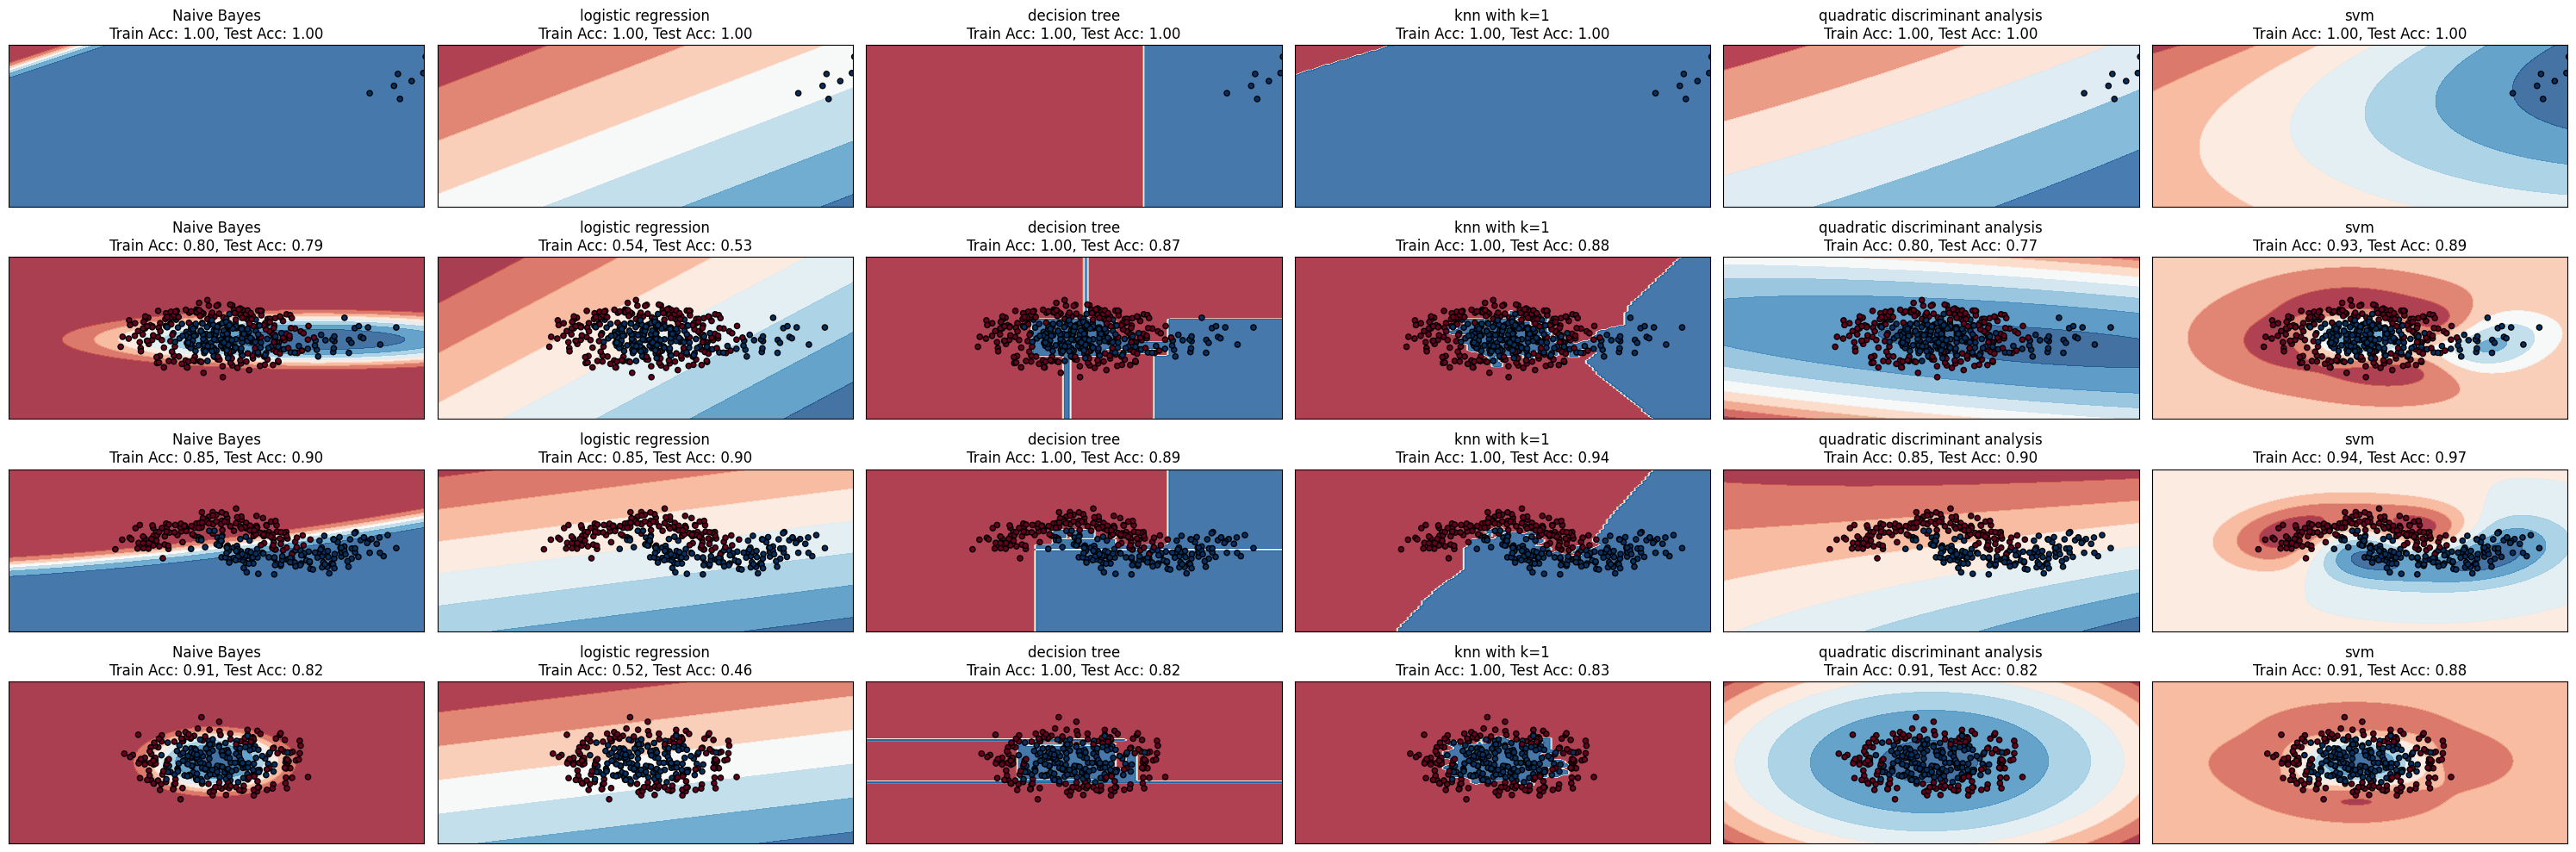

In [14]:
#creating plots 
fig=plt.figure(figsize=(30,10))
i=1

for dataset, (X,y) in enumerate(data_list):
    #Split the data into training and test set 
    X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)

    #creating meshgrid 
    x_min, x_max=-3, 3
    y_min, y_max=-3, 3
    xx, yy=np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

    for name, clf in classifiers.items():
        ax=plt.subplot(len(data_list), len(classifiers), i)
        clf.fit(X_train, y_train)
        training_score=clf.score(X_train, y_train)
        test_score=clf.score(X_test, y_test)

        #plot decision boundaries
        if hasattr(clf, "decision_function"):
            Z=clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
        else:
            Z=clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:, 1]
        
        Z=Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

        #plotting training points
        ax.scatter(X_train[:, 0], X_train[:,1], c=y_train, cmap=plt.cm.RdBu, s=20, edgecolors='k')
        ax.scatter(X_test[:, 0], X_test[:,1], c=y_test, cmap=plt.cm.RdBu, s=20, edgecolors='k')

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_title(f"{name}\nTrain Acc: {training_score:.2f}, Test Acc: {test_score:.2f}")
        ax.set_xticks(())
        ax.set_yticks(())

        i +=1
    

plt.tight_layout()
plt.show()



